In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings(action = 'ignore')

### 1. 데이터 로드 및 데이터프레임 정리

In [2]:
tmp_df = pd.read_csv('../data/행정동_기준_동별데이터_버스추가_1028.csv')
pd.set_option('display.max_columns',35)
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HOSPITAL_NUM',
       'HIGH_SCH_NUM', 'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM',
       'DPTM_NUM', 'CON_NUM', 'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM',
       'CAFE_NUM', 'BUS_NUM', 'BIKE_NUM', 'ANI_HSPT_NUM', 'ACADEMY_NUM', 'GU',
       'DONG', 'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [4]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BUS_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,18.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,25.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,22.000000,9.000000,8.000000,100.000000,28.0


In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM','BUS_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM','SAFE_DLVR_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,BUS_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,11.666667,2.000000,1.0,56.666667,1.000000,11.666667,4.333333,0.0,4.000000,39.666667,2.000000,2.000000,3.0,18.000000,0.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,18.666667,3.000000,0.0,41.666667,0.000000,74.666667,17.333333,0.0,20.000000,100.666667,2.000000,0.000000,0.0,19.000000,10.000000,10.333333,0.000000,7.333333,0.0,22848.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,8.000000,1.000000,0.0,22.000000,0.000000,7.000000,2.000000,0.0,2.000000,52.000000,0.000000,1.000000,1.0,2.000000,10.000000,1.000000,0.000000,1.000000,0.0,14112.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,18.000000,1.000000,1.0,41.000000,0.000000,4.000000,1.000000,0.0,8.000000,30.000000,4.000000,1.000000,1.0,24.000000,0.000000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,25.000000,1.000000,0.0,21.000000,0.000000,14.000000,5.000000,0.0,6.000000,36.000000,0.000000,0.000000,1.0,28.000000,0.000000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,22.000000,0.000000,1.0,119.000000,1.000000,120.000000,35.000000,0.0,76.000000,63.000000,6.000000,1.000000,0.0,100.000000,20.000000,10.000000,1.000000,2.000000,0.0,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,7.000000,1.000000,0.0,32.500000,0.000000,14.500000,10.000000,0.0,17.000000,17.500000,2.000000,1.500000,1.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [7]:
# 불필요 컬럼 제거
tmp = tmp.drop(['CCTV_NUM','SPORT_NUM','FIRE_NUM','BUS_NUM'],axis=1)

In [8]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.622066,43.866197,12.169014,0.063380,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.503566,42.152057,7.266001,0.207678,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,23.500000,8.000000,0.000000,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.666667,34.500000,11.000000,0.000000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,1.000000,48.250000,14.000000,0.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,3.500000,357.500000,50.000000,1.500000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


**컬럼 별로 합을 구해서 데이터프레임 재정렬**

In [9]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','SAFE_DLVR_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVINIENCE','EDUCATION','PARANTING']

In [13]:
def assembling(df,sum_list,name_list): # 큰 카테고리로 묶는 함수
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        x = df[sum_list[j]]
        k = []

        for i in range(len(df)):
            sum_k = sum(x.loc[i]) # 합하는 데 가중치 미부여 상태
            k.append(sum_k)

        x[name_list[j]] = k
        x = x.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(x)
    del(df_tmp[0])
    return df_tmp

In [14]:
# 컬럼 끼리 더한 데이터
y = assembling(tmp,sum_list,name_list)
y

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING
0,20.000000,3.0,16.000000,43.666667,25.0,7.333333
1,29.000000,3.0,92.000000,120.666667,21.0,20.333333
2,19.000000,1.0,9.000000,54.000000,4.0,11.000000
3,14.000000,1.0,5.000000,38.000000,30.0,5.000000
4,44.000000,1.0,19.000000,42.000000,29.0,10.000000
...,...,...,...,...,...,...
421,17.333333,1.0,72.666667,86.333333,65.0,20.666667
422,15.333333,1.0,72.666667,86.333333,65.0,20.666667
423,38.000000,1.0,155.000000,139.000000,107.0,30.000000
424,10.000000,1.0,24.500000,34.500000,42.5,0.000000


In [15]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df,asmb_df,sum_list,name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE'] + name_list +['KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [16]:
tmp_df = data_frame_redirect(tmp_df,y,sum_list,name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'TRANSPORT', 'SECURITY', 'HEALTH',
       'CONVINIENCE', 'EDUCATION', 'PARANTING', 'KIDS_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'SPORT_NUM', 'GYM_NUM',
       'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [17]:
col = tmp_df.columns[3:]
data = tmp_df[col].values

### 2. Elbow 확인

In [18]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,22848.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,14112.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000


In [19]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

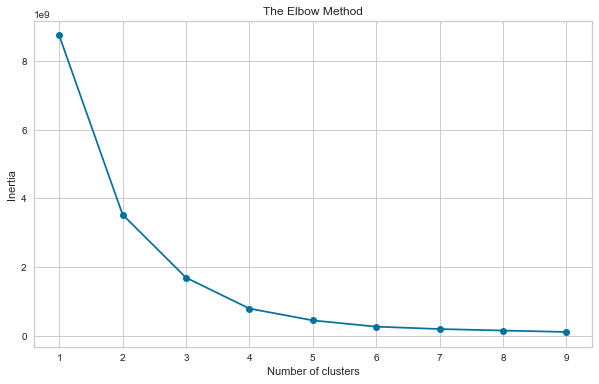

In [20]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### 2.1 1차 k-mens, N_cluster = 3

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [22]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
1,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


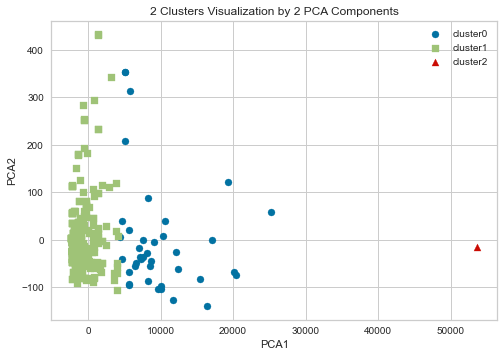

In [23]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

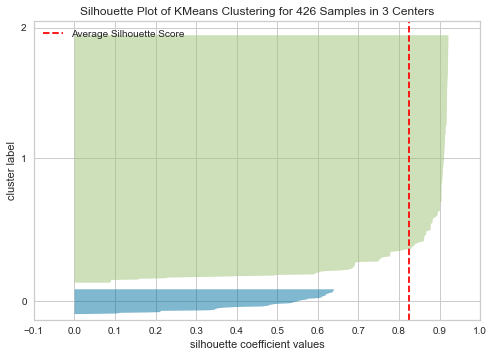

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [25]:
score = silhouette_score(data,df['km_cluster'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.824


**각 군집 별 데이터 확인**

In [27]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [28]:
df_cluster_2.describe() # std 값이 Nan 인 이유는 집단의 객체가 1개이기 때문
# 소음 신고 건수가 50000건 이상

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0
25%,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0
50%,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0
75%,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0
max,80.5,3.0,204.0,298.166667,105.5,70.333333,1.0,13.333333,1.0,56112.0,4.0,0.0,10.0,5.0,18.0,0.0


In [29]:
df_cluster_1 = df[df['km_cluster'] == 1][col] # 386개

In [30]:
df_cluster_1.describe()
# 소음 건수 : min = 125.75, max = 6510

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,22.265976,1.152418,52.447755,59.375216,62.327720,36.227116,0.510794,1.032815,0.189119,1330.604059,1.123057,0.160622,7.163644,3.588083,3.958549,2.075993
std,12.917760,0.622549,39.520377,47.679415,56.577924,25.681149,0.594621,1.658454,0.324235,1343.803188,1.300939,0.530510,6.289676,4.211514,2.786463,1.227470
min,4.333333,0.000000,2.000000,3.166667,3.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.833333,32.500000,38.000000,31.500000,18.000000,0.000000,0.285714,0.000000,429.666667,0.000000,0.000000,3.500000,1.428571,2.285714,1.400000
50%,19.000000,1.000000,45.000000,50.000000,45.125000,31.083333,0.333333,0.666667,0.000000,893.500000,0.833333,0.000000,5.750000,2.500000,3.500000,2.000000
75%,25.281250,1.500000,61.312500,63.000000,72.833333,48.250000,0.666667,1.200000,0.276786,1860.000000,1.666667,0.000000,8.166667,4.500000,5.000000,2.500000
max,102.000000,3.125000,345.500000,413.500000,492.250000,207.000000,4.250000,18.000000,4.000000,6510.000000,12.000000,4.000000,45.000000,32.500000,21.000000,8.000000


In [31]:
df_cluster_0 = df[df['km_cluster'] == 0][col] # 39개

In [32]:
df_cluster_0.describe()
# 소음 건수 : min = 6890, max = 27744
# 병원 및 약국의 수치가 조금 더 높음

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,29.252137,1.491453,87.747863,117.846154,61.923077,31.743590,0.585470,3.666667,0.333333,12181.072650,1.833333,0.230769,10.200855,3.974359,5.512821,2.324786
std,12.776868,1.102860,93.545599,80.978784,64.374315,28.019387,1.107439,3.772980,0.610579,5099.989449,3.325209,0.864856,11.992516,5.356793,5.046043,2.505534
min,8.000000,0.000000,9.000000,21.000000,1.000000,3.000000,0.000000,0.000000,0.000000,6890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.750000,1.000000,31.250000,62.000000,18.250000,13.500000,0.000000,1.000000,0.000000,8213.750000,0.000000,0.000000,3.000000,0.500000,2.000000,1.000000
50%,27.000000,1.000000,50.500000,94.166667,39.500000,24.500000,0.000000,3.000000,0.000000,10735.000000,0.500000,0.000000,6.500000,3.000000,4.500000,2.000000
75%,34.500000,2.000000,95.500000,156.000000,88.666667,38.750000,1.000000,4.000000,0.750000,13584.000000,2.000000,0.000000,12.083333,4.000000,7.000000,3.000000
max,59.000000,4.500000,395.500000,363.000000,258.000000,131.000000,4.000000,18.500000,3.000000,27744.000000,15.000000,5.000000,60.000000,28.000000,24.000000,12.000000


### 2.2 2차 k-means

#### km_cluster == 0

In [33]:
df_1 = df[df['km_cluster'] == 0]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.000000,16.000000,43.666667,25.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.0,0.0,0.000000,0.000000,1.000000,2.000000,16362.894081,-140.329517
1,종로구,사직동,1111053000,29.000000,3.000000,92.000000,120.666667,21.000000,20.333333,0.000000,7.333333,0.0,22848.000000,1.0,0.0,18.000000,3.000000,5.000000,1.000000,20395.448289,-74.501278
2,종로구,삼청동,1111054000,19.000000,1.000000,9.000000,54.000000,4.000000,11.000000,0.000000,1.000000,0.0,14112.000000,0.0,1.0,3.000000,0.000000,1.000000,0.000000,11659.000776,-127.898904
6,종로구,교남동,1111058000,19.000000,1.000000,37.000000,26.000000,24.000000,36.000000,1.000000,4.000000,0.0,12096.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,9642.991689,-103.098001
7,종로구,가회동,1111060000,13.000000,0.000000,9.000000,61.000000,7.000000,3.000000,0.000000,2.000000,0.0,8064.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,5611.138185,-94.375254
9,종로구,종로5.6가동,1111063000,21.000000,2.000000,117.000000,62.000000,9.000000,53.000000,0.000000,0.000000,0.0,10080.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7627.434707,-36.935916
11,종로구,혜화동,1111065000,19.500000,3.000000,46.000000,87.500000,49.500000,28.000000,0.000000,2.000000,1.0,11088.000000,3.0,0.0,5.000000,0.000000,2.000000,1.000000,8635.365082,-44.619814
17,중구,소공동,1114052000,34.000000,1.000000,78.500000,162.500000,14.000000,30.500000,0.000000,9.000000,0.0,10070.000000,0.0,0.0,6.500000,3.000000,8.500000,0.000000,7617.857848,-0.535205
18,중구,회현동,1114054000,37.000000,2.500000,81.000000,153.000000,2.000000,38.500000,0.000000,9.500000,0.0,6890.000000,0.0,0.0,5.000000,0.000000,7.500000,0.000000,4437.870966,4.601826


In [34]:
col_1 = df_1.columns[3:-2]
data_1 = df_1[col_1].values

In [35]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.000000,16.000000,43.666667,25.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.0,0.0,0.000000,0.000000,1.000000,2.000000,6634.822716,-104.784120
1,종로구,사직동,1111053000,29.000000,3.000000,92.000000,120.666667,21.000000,20.333333,0.000000,7.333333,0.0,22848.000000,1.0,0.0,18.000000,3.000000,5.000000,1.000000,10666.856667,-5.199156
2,종로구,삼청동,1111054000,19.000000,1.000000,9.000000,54.000000,4.000000,11.000000,0.000000,1.000000,0.0,14112.000000,0.0,1.0,3.000000,0.000000,1.000000,0.000000,1930.934901,-116.224669
6,종로구,교남동,1111058000,19.000000,1.000000,37.000000,26.000000,24.000000,36.000000,1.000000,4.000000,0.0,12096.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,-85.122012,-102.692337
7,종로구,가회동,1111060000,13.000000,0.000000,9.000000,61.000000,7.000000,3.000000,0.000000,2.000000,0.0,8064.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,-4117.025782,-116.008026
9,종로구,종로5.6가동,1111063000,21.000000,2.000000,117.000000,62.000000,9.000000,53.000000,0.000000,0.000000,0.0,10080.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-2101.110910,-32.597015
11,종로구,혜화동,1111065000,19.500000,3.000000,46.000000,87.500000,49.500000,28.000000,0.000000,2.000000,1.0,11088.000000,3.0,0.0,5.000000,0.000000,2.000000,1.000000,-1093.049994,-53.603613
17,중구,소공동,1114052000,34.000000,1.000000,78.500000,162.500000,14.000000,30.500000,0.000000,9.000000,0.0,10070.000000,0.0,0.0,6.500000,3.000000,8.500000,0.000000,-2110.875582,-4.970033
18,중구,회현동,1114054000,37.000000,2.500000,81.000000,153.000000,2.000000,38.500000,0.000000,9.500000,0.0,6890.000000,0.0,0.0,5.000000,0.000000,7.500000,0.000000,-5290.834324,-15.192321


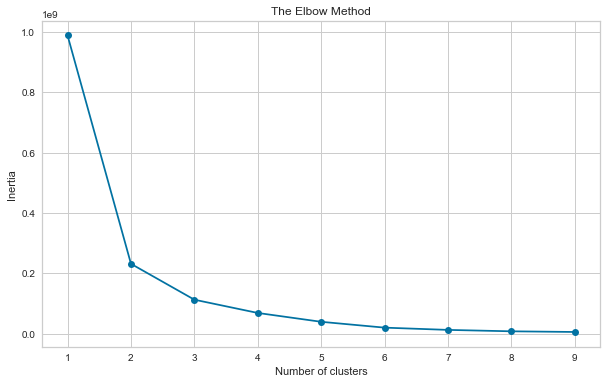

In [36]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [38]:
df_1['km_cluster_1'] = kmeans.labels_
df_1.groupby('km_cluster_1').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster_1,,,,,,,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


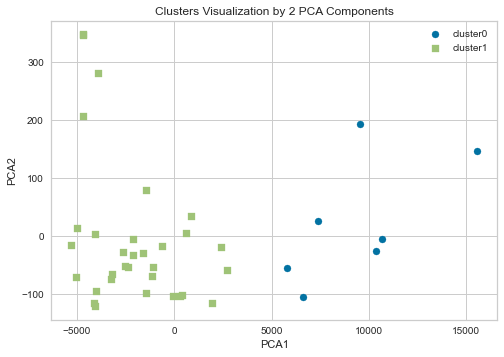

In [39]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster_1'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster_1'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

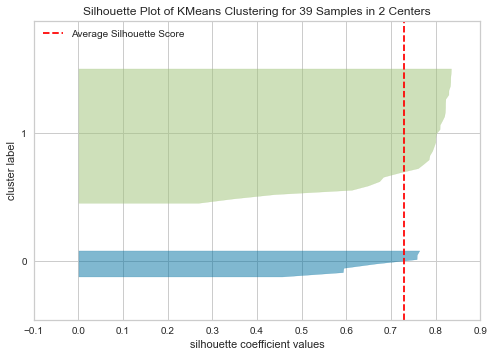

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [41]:
score = silhouette_score(data_1,df_1['km_cluster_1'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.729


#### km_cluster == 1

In [42]:
df_2 = df[df['km_cluster'] == 1]
df_2 = df_2.drop('km_cluster',axis=1)
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.000000,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000,3595.060808,-84.809209
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.000000,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000,1579.186785,-62.921049
5,종로구,무악동,1111057000,8.000000,0.0,10.000000,12.000000,22.0,13.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,-436.995849,-81.466092
10,종로구,이화동,1111064000,16.000000,1.0,24.000000,67.000000,11.0,5.000000,0.000000,4.000000,1.000000,6048.000000,0.000000,0.0,3.0,1.000000,7.000000,0.000000,3595.255601,-69.783155
12,종로구,창신1동,1111067000,8.333333,1.0,21.333333,16.666667,6.0,9.666667,0.000000,0.000000,0.333333,672.000000,0.000000,0.0,1.0,0.333333,0.000000,0.333333,-1780.926171,-76.234008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.000000,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667,-1010.053252,25.351776
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.000000,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667,-1010.055175,25.216020
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.000000,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000,1875.113943,114.484062


In [43]:
col_2 = df_2.columns[3:-2]
data_2 = df_2[col_2].values

In [44]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.000000,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000,4716.060731,-126.275865
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.000000,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000,2700.510028,-87.476647
5,종로구,무악동,1111057000,8.000000,0.0,10.000000,12.000000,22.0,13.000000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,684.182569,-87.110396
10,종로구,이화동,1111064000,16.000000,1.0,24.000000,67.000000,11.0,5.000000,0.000000,4.000000,1.000000,6048.000000,0.000000,0.0,3.0,1.000000,7.000000,0.000000,4716.411261,-114.899518
12,종로구,창신1동,1111067000,8.333333,1.0,21.333333,16.666667,6.0,9.666667,0.000000,0.000000,0.333333,672.000000,0.000000,0.0,1.0,0.333333,0.000000,0.333333,-659.635120,-72.274263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.000000,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667,112.162536,21.498449
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.000000,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667,112.156892,21.358163
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.000000,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000,2998.004443,80.708429


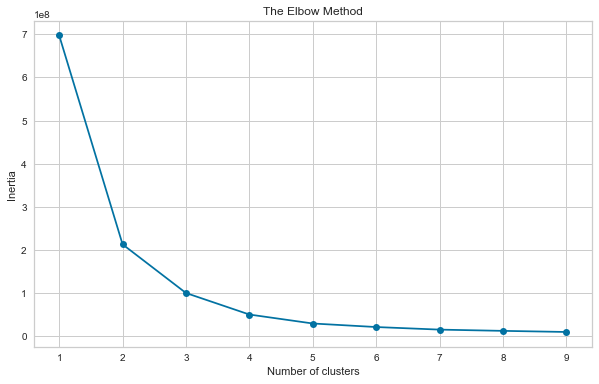

In [45]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [47]:
df_1['km_cluster_1'] = kmeans.labels_
df_1.groupby('km_cluster_1').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster_1,,,,,,,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
1,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


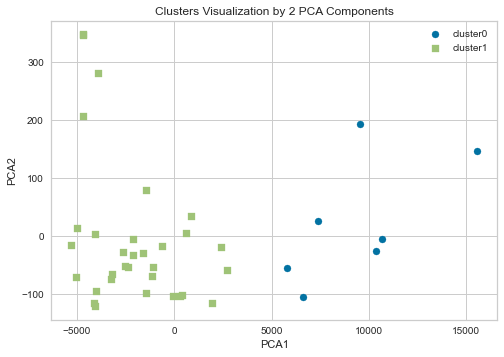

In [48]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster_1'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster_1'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

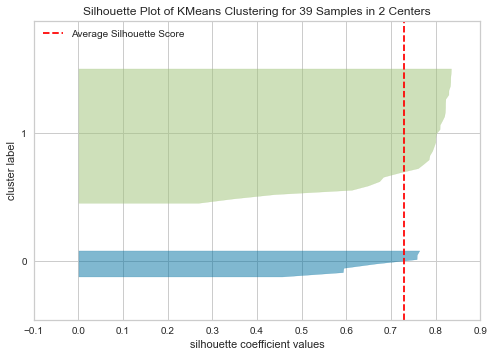

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 39 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [50]:
score = silhouette_score(data_1,df_1['km_cluster_1'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.729
